In [60]:
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
alcohol = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\gapminder_alcohol.csv")

In [62]:
alcohol2 = alcohol 
alcohol.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [63]:
alcohol.dropna(subset=['alcconsumption','urbanrate'],inplace=True)

In [86]:
alcohol['Nivel de urbanizacion'] = pd.qcut(alcohol.urbanrate,3,labels=['Baja urbanizacion','Urbanizacion media','Urbanizacion alta'])

In [87]:
max = np.floor((alcohol.alcconsumption.max()+1))

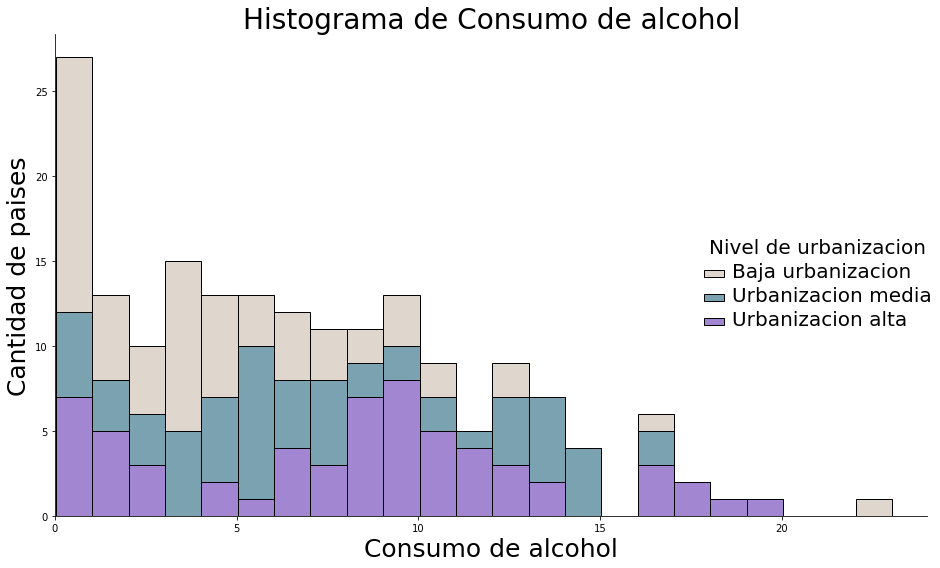

In [99]:
from matplotlib import pyplot as plt

ax = sns.displot(alcohol,x='alcconsumption',hue='Nivel de urbanizacion',multiple='stack',binwidth=1,height=8,aspect=1.4,palette={'Urbanizacion alta':'#845EC2','Urbanizacion media':'#4E8397','Baja urbanizacion':'#D5CABD'})

# Add labels
plt.title('Histograma de Consumo de alcohol',fontsize=28)
ax.set_axis_labels(x_var="Consumo de alcohol", y_var="Cantidad de paises",fontsize=25)
plt.setp(ax._legend.get_title(), fontsize=20)
plt.setp(ax._legend.get_texts(),fontsize=20)
ax.set(xlim=(0, max))
#ax.figure.set_figwidth(18)
plt.tight_layout()
plt.savefig('foo2.png')

In [108]:
alcohol2.dropna(subset=['incomeperperson','alcconsumption'],inplace=True)

In [109]:
alcohol2['Tasa de empleo'] = pd.cut(alcohol2.employrate,bins=[0,50,75,100],labels=['0%-50%','50%-75%','75%-100%'])

Text(0.5, 0, 'Tasa de empleo')

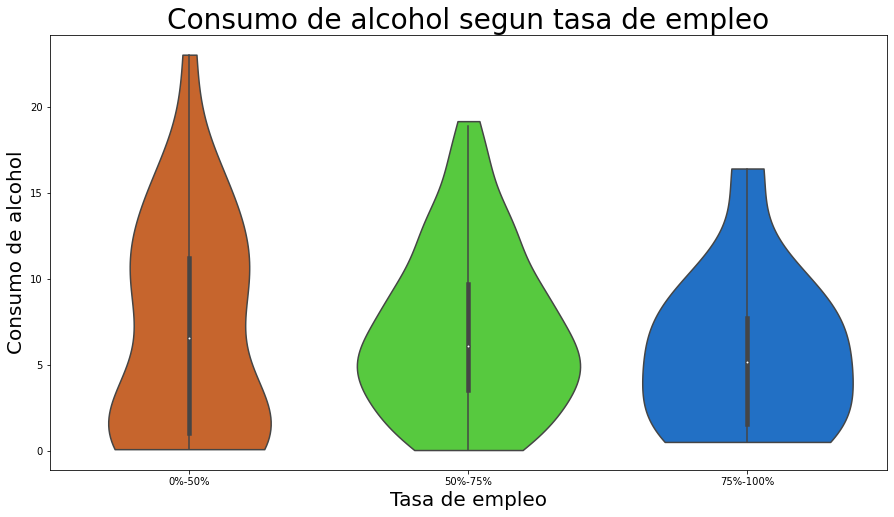

In [119]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.violinplot(x=alcohol2['Tasa de empleo'],y=alcohol2['alcconsumption'],cut=0,palette=['#E05E13','#48E028','#076FE0'])
plt.title('Consumo de alcohol segun tasa de empleo',fontsize=28)
ax.set_ylabel("Consumo de alcohol",fontsize=20)
ax.set_xlabel("Tasa de empleo",fontsize=20)